In [67]:
# General information
classes = ['Esophagus', 'Heart', 'Trachea', 'Aorta']
metrics = ['dice', 'sensitivity', 'specificity', 'hausdorff', 'iou', 'precision', 'volumetric', 'VOE']

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [68]:
model = 'samed'

In [69]:
result_location = f'../results_metrics/{model}/metrics2d/'
folders = [result_location + f + '/test_metrics.csv' for f in os.listdir(result_location) if os.path.isdir(os.path.join(result_location, f))]
folders

['../results_metrics/samed/metrics2d/bestweights_samed_1024_r4_augment_no_normalize_no_2024-10-08/test_metrics.csv',
 '../results_metrics/samed/metrics2d/bestweights_samed_1024_r6_augment_no_normalize_yes_2024-10-08/test_metrics.csv',
 '../results_metrics/samed/metrics2d/bestweights_samed_1024_r6_augment_yes_normalize_yes_2024-10-08/test_metrics.csv',
 '../results_metrics/samed/metrics2d/bestweights_samed_1024_r4_augment_yes_normalize_yes_2024-10-08/test_metrics.csv',
 '../results_metrics/samed/metrics2d/bestweights_samed_1024_r6_augment_yes_normalize_no_2024-10-08/test_metrics.csv',
 '../results_metrics/samed/metrics2d/bestweights_samed_1024_r6_augment_no_normalize_no_2024-10-08/test_metrics.csv']

In [70]:
idx = 1  # of folder
print(folders[idx])
metrics = pd.read_csv(folders[idx], header=0)
# drop the first column
metrics = metrics.drop(metrics.columns[0], axis=1)

../results_metrics/samed/metrics2d/bestweights_samed_1024_r6_augment_no_normalize_yes_2024-10-08/test_metrics.csv


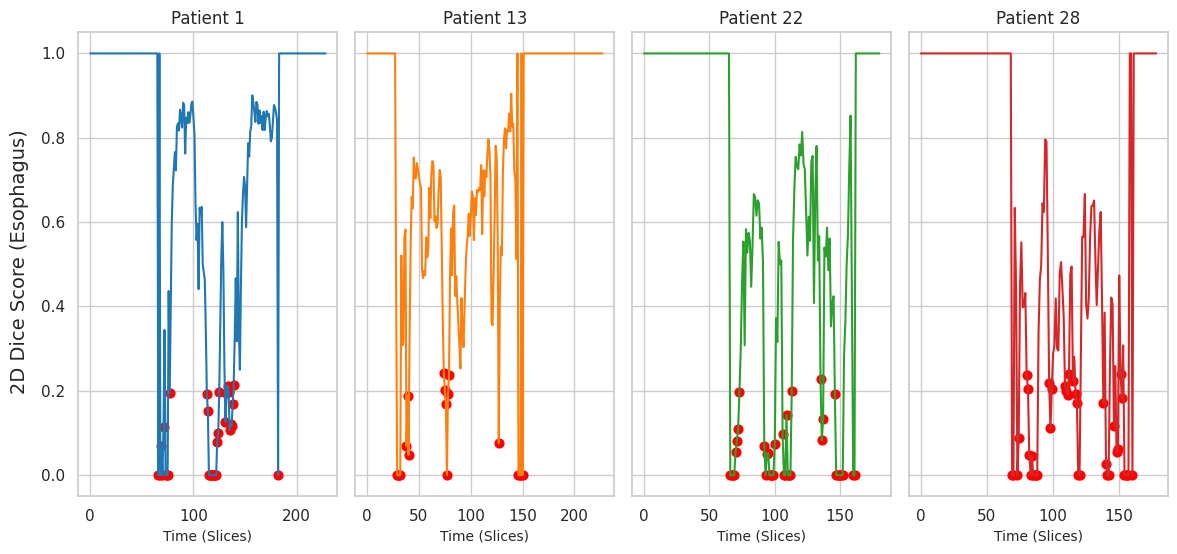

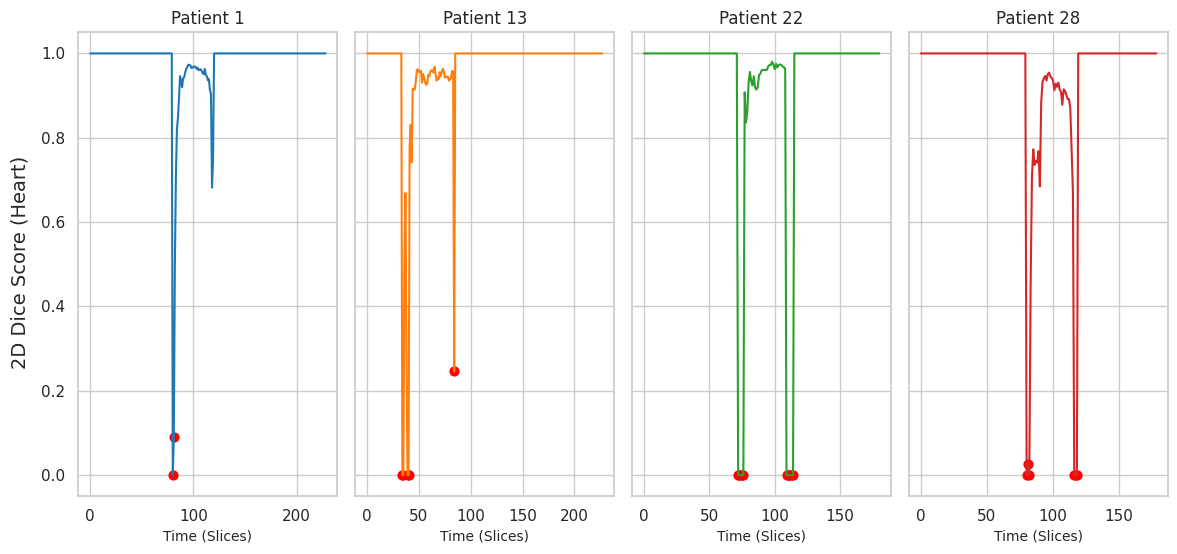

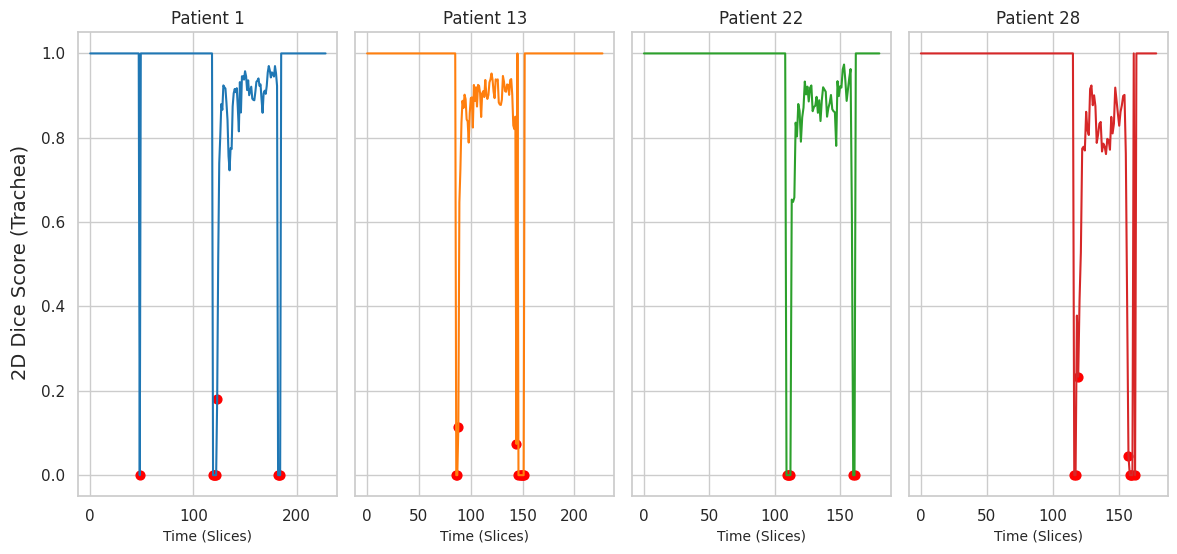

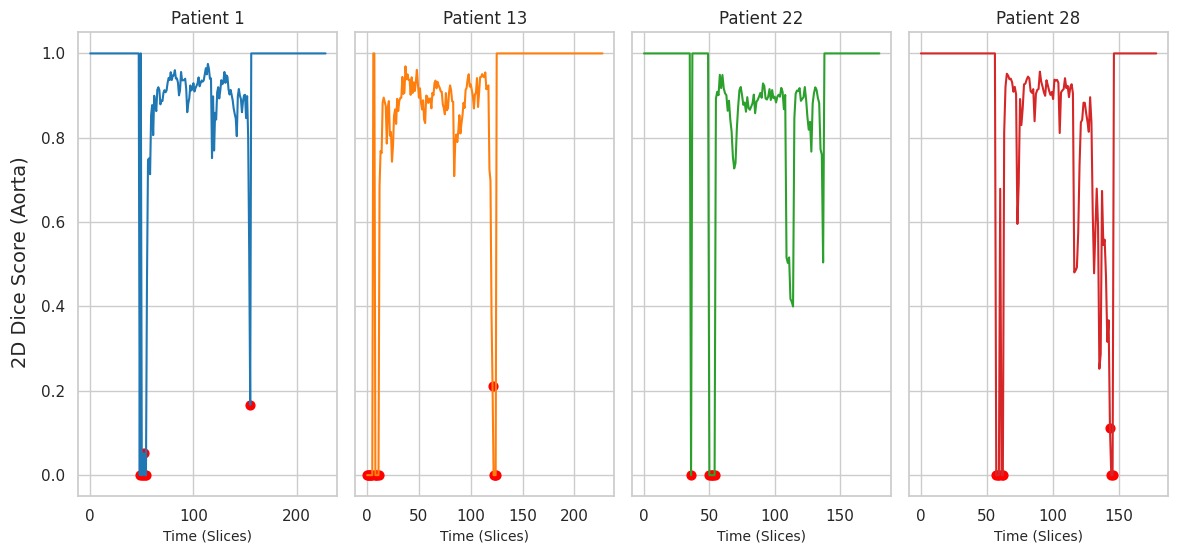

In [71]:
for c in classes:

    # Set a Seaborn style for aesthetics
    sns.set(style="whitegrid")

    # Extract heart_dice values
    heart_dice = metrics[(metrics['class'] == c) & (metrics['metric_type'] == 'Dice')]["metric_value"].values

    # Extract patient_ids
    patient_ids = metrics[(metrics['class'] == c) & (metrics['metric_type'] == 'Dice')]["patient_id"].values

    # Identify unique patients and change indices
    unique_patients, change_indices = np.unique(patient_ids, return_index=True)

    # Set threshold for low dice scores
    low_dice_threshold = 0.25

    # Create subplots with 4 side-by-side plots
    fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey=True)

    # Create a color palette
    palette = sns.color_palette("tab10", len(unique_patients))

    # Plot heart_dice values for each patient
    for i, ax in enumerate(axes):
        if i >= len(unique_patients):  # Skip if more subplots than patients
            break
        
        patient = unique_patients[i]
        start_idx = change_indices[i]
        end_idx = change_indices[i + 1] if i + 1 < len(unique_patients) else len(heart_dice)
        
        # Set x_values for each patient starting at 0
        x_values = np.arange(end_idx - start_idx)
        
        # Plot each patient's data
        ax.plot(x_values, heart_dice[start_idx:end_idx], label=f'Patient {patient}', color=palette[i])
        
        # Highlight low dice scores with red bullet points
        low_dice_indices = np.where(heart_dice[start_idx:end_idx] < low_dice_threshold)[0]
        ax.scatter(x_values[low_dice_indices], heart_dice[start_idx:end_idx][low_dice_indices], 
                color='red', s=40, label='Low Dice' if i == 0 else "")
        
        # Add patient-specific titles and labels
        ax.set_title(f'Patient {patient}', fontsize=12)
        ax.set_xlabel('Time (Slices)', fontsize=10)

    # Common labels
    fig.supylabel(f'2D Dice Score ({c})', fontsize=14)
    plt.subplots_adjust(top=0.85)

    # Adjust layout for clarity
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Show plot
    plt.show()
